#### Background

This notebook compares the rates at which seniors have disabilities and access to a vehicle to these rates for all residents of Los Angeles.

In [1]:
#first we import pandas 
import pandas as pd
import geopandas as gpd

First we use the Census API to get data on disability status by age for the City of Los Angeles.

In [2]:
import requests
apirequest = 'https://api.census.gov/data/2021/acs/acs5/subject?get=NAME,S1810_C03_001E,S1810_C01_017E,S1810_C01_018E,S1810_C02_017E,S1810_C02_018E&for=place:44000&in=state:06'
usr_key = f"&key=4c422219a890d0597a042d9ebad9311b022cfd4d"
#Put it all together in one f-string:
query_url = f"{apirequest}{usr_key}"
# Use requests package to call out to the API
response = requests.get(query_url)

Next we will convert the API results to a dataframe with meaningful columns that can be worked with in Python.

In [3]:
# First we have to convert this to a dataframe we can work with.
census_df=pd.DataFrame(response.json())
census_df.head()

# Move variable names from row 0 to colmn titles.
census_df.columns = census_df.iloc[0]
disability_clean = census_df.iloc[1:]

# Rename columns to be meaningful.
disability_clean=disability_clean.rename(columns={'S1810_C03_001E':'Pct with Disability',
                                                  'S1810_C01_017E':'pop_65_74','S1810_C01_018E':'pop_75_plus',
                                                  'S1810_C02_017E':'disability_65_74','S1810_C02_018E':'disability_75_plus'})
disability_clean.head(5)

,NAME,Pct with Disability,pop_65_74,pop_75_plus,disability_65_74,disability_75_plus,state,place
1,"Los Angeles city, California",10.3,292583,200219,74141,105996,06,44000


Next we will calculate the percent of the total population and the percent of the senior population that has a disability.

In [4]:
disability_clean=disability_clean.astype({'Pct with Disability':'float', 'pop_65_74':'int', 'pop_75_plus':'int', 'disability_65_74': 'int', 'disability_75_plus':'int'})
disability_clean['seniors_all']=disability_clean['pop_65_74']+disability_clean['pop_75_plus']
disability_clean['seniors_disability']=disability_clean['disability_65_74']+disability_clean['disability_75_plus']
disability_clean['Pct Seniors with Disability']=round(100*disability_clean['seniors_disability']/disability_clean['seniors_all'])
disability_clean=disability_clean[['NAME','Pct with Disability','Pct Seniors with Disability']]
disability_clean['Pct with Disability']=round(disability_clean['Pct with Disability'])
disability_clean

,NAME,Pct with Disability,Pct Seniors with Disability
1,"Los Angeles city, California",10.0,37.0


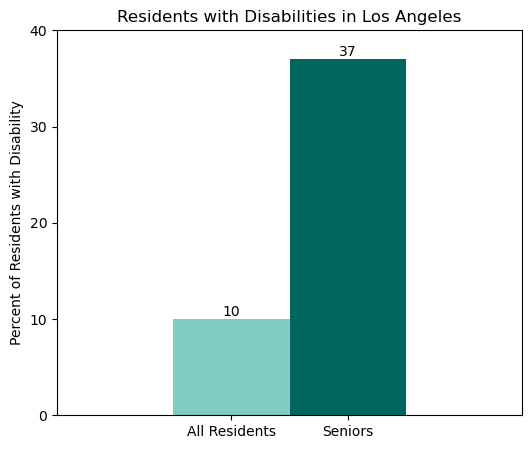

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,5))

#Create bar plot and label the two bars with their values.
ax = disability_clean.plot(ax=ax, kind='bar', color=['#80cdc1','#01665e'] , legend=False)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

# Adjust x-axis so it doesn't have a subtitle or ticks.
plt.xlabel(None)
labels=['All Residents','Seniors']
plt.xticks(ticks=[-0.125,0.125],labels=labels,rotation=0)
#plt.xticks(ticks=[-0.125,0.125], labels=list(cols[1:3]),rotation=10)

# Ajust y-axis so that it has desired subtitle and ticks.
plt.ylabel("Percent of Residents with Disability")
ax.set_yticks((0,10,20,30,40))

#Adjust title.
plt.title("Residents with Disabilities in Los Angeles")
plt.show()

First we use the Census API to get data on vehicle ownership by tenure by age for the City of Los Angeles.

In [5]:
import requests
apirequest = 'https://api.census.gov/data/2021/acs/acs5?get=NAME,B25045_003E,B25045_006E,B25045_007E,B25045_010E,B25045_012E,B25045_015E,B25045_016E,B25045_019E&for=place:44000&in=state:06'
usr_key = f"&key=4c422219a890d0597a042d9ebad9311b022cfd4d"
#Put it all together in one f-string:
query_url = f"{apirequest}{usr_key}"
# Use requests package to call out to the API
response = requests.get(query_url)

Now we will rename our columns.

In [6]:
# First we have to convert this to a dataframe we can work with.
census_df=pd.DataFrame(response.json())
census_df.head()

# Move variable names from row 0 to colmn titles.
census_df.columns = census_df.iloc[0]
vehicle_clean = census_df.iloc[1:]

# Rename columns to be meaningful.
vehicle_clean=vehicle_clean.rename(columns={'B25045_003E':'Owner no vehicle', 'B25045_006E':'Owner no vehicle 65+',
                         'B25045_007E':'Owner with vehicle', 'B25045_010E' : 'Owner with vehicle 65+',
                         'B25045_012E' : 'Renter no vehicle', 'B25045_015E' : 'Renter no vehicle 65+',
                         'B25045_016E' : 'Renter with vehicle', 'B25045_019E' : 'Renter with vehicle 65+'},)
vehicle_clean.head(5)

,NAME,Owner no vehicle,Owner no vehicle 65+,Owner with vehicle,Owner with vehicle 65+,Renter no vehicle,Renter no vehicle 65+,Renter with vehicle,Renter with vehicle 65+,state,place
1,"Los Angeles city, California",17341,10951,493319,151011,144350,47232,729841,77809,06,44000


Now we create a new dataframe with calculated percentages.

In [7]:
# Cast as integers to be able to do calculations.
vehicle_clean=vehicle_clean.astype({'Owner no vehicle':'int', 'Owner no vehicle 65+':'int', 'Owner with vehicle':'int', 'Owner with vehicle 65+': 'int', 
                                  'Renter no vehicle':'int', 'Renter no vehicle 65+' : 'int', 'Renter with vehicle' : 'int' , 'Renter with vehicle 65+' : 'int'})

# Calculate necesarry subtotals.
vehicle_clean['Total HH']=vehicle_clean['Owner no vehicle']+vehicle_clean['Owner with vehicle']+vehicle_clean['Renter no vehicle']+vehicle_clean['Renter with vehicle']
vehicle_clean['Senior HH']=vehicle_clean['Owner no vehicle 65+']+vehicle_clean['Owner with vehicle 65+']+vehicle_clean['Renter no vehicle 65+']+vehicle_clean['Renter with vehicle 65+']
vehicle_clean['Total No Vehicle']=vehicle_clean['Owner no vehicle']+vehicle_clean['Renter no vehicle']
vehicle_clean['Senior No Vehicle']=vehicle_clean['Owner no vehicle 65+']+vehicle_clean['Renter no vehicle 65+']

# Calculate rounded, plot-friendly percentages.
vehicle_clean['Pct Households Without a Vehicle'] = round(vehicle_clean['Total No Vehicle']/vehicle_clean['Total HH']*100)
vehicle_clean['Pct Senior-Headed Households Without a Vehicle']= round(vehicle_clean['Senior No Vehicle']/vehicle_clean['Senior HH']*100)
vehicle_clean=vehicle_clean[['NAME','Pct Households Without a Vehicle', 'Pct Senior-Headed Households Without a Vehicle']]

Now I can make my plot!

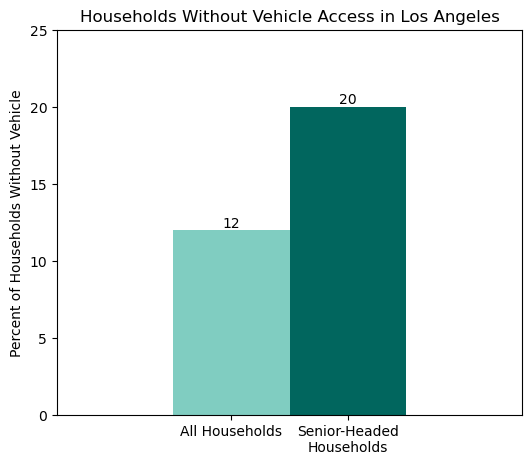

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,5))

#Create bar plot and label the two bars with their values.
ax = vehicle_clean.plot(ax=ax, kind='bar', color=['#80cdc1','#01665e'] , legend=False)
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

# Adjust x-axis so it doesn't have a subtitle or ticks.
plt.xlabel(None)
labels=['All Households','Senior-Headed'+'\n'+'Households']
plt.xticks(ticks=[-0.125,0.125],labels=labels,rotation=0)
#plt.xticks(ticks=[-0.125,0.125], labels=list(cols[1:3]),rotation=10)

# Ajust y-axis so that it has desired subtitle and ticks.
plt.ylabel("Percent of Households Without Vehicle")
ax.set_yticks((0,5,10,15,20,25))

#Adjust title.
plt.title("Households Without Vehicle Access in Los Angeles")
plt.show()